In [85]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [86]:
df = pd.read_csv('final_df.csv')

In [87]:
df = df.drop(columns='Unnamed: 0')

## Splitting and Scaling

In [88]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Target', axis=1) # grabs everything else but 'Default'

# Create target variable
y = df['Target'] # y is the column we're trying to predict

In [89]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=30)

In [90]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train, columns = X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data = X_test,columns = X.columns)

## Logistic Regression 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train, y_train)

base_logred_train_pred = logreg.predict(X_train)
base_logred_test_pred = logreg.predict(X_test)


base_logreg_recall = metrics.recall_score(y_test, base_logred_test_pred)
base_logred_train_f1_score = f1_score(y_train, base_logred_train_pred)
base_logreg_test_f1_score = f1_score(y_test, base_logred_test_pred)


print('Recall Score: ', base_logreg_recall)
print('Train F1 score: ', base_logred_train_f1_score)
print('Test F1 score: ', base_logreg_test_f1_score)

Recall Score:  0.8444444444444444
Train F1 score:  0.9045643153526971
Test F1 score:  0.8260869565217391


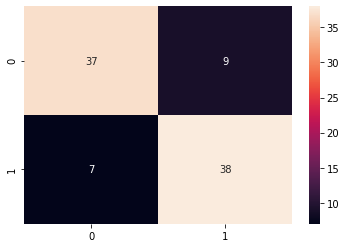

In [92]:
cm = confusion_matrix(y_test,base_logred_test_pred)
sns.heatmap(cm,annot=True);

## KNN

Maximum accuracy:- 0.9333333333333333 at K = 10


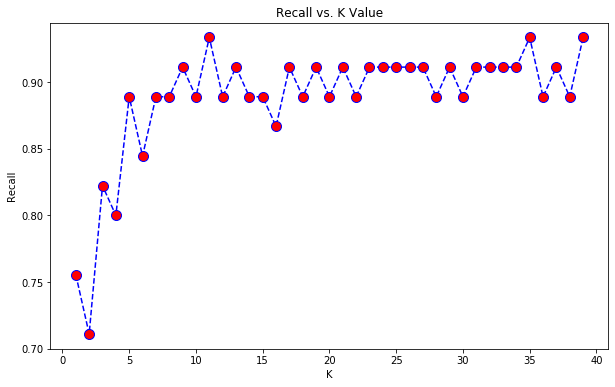

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Will take some time
acc = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(metrics.recall_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [94]:
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)

KNN_train_preds = knn.predict(X_train)
KNN_preds = knn.predict(X_test)

In [95]:
KNN_recall = metrics.recall_score(y_test, KNN_preds)
KNN_train_f1_score = f1_score(y_train, KNN_train_preds)
KNN_f1_score = f1_score(y_test, KNN_preds)


print('Recall Score: ', KNN_recall)
print('Train F1 score: ', KNN_train_f1_score)
print('Test F1 score: ', KNN_f1_score)

Recall Score:  0.9111111111111111
Train F1 score:  0.8537549407114625
Test F1 score:  0.845360824742268


In [96]:
print('KNN Classification Report')
print(classification_report(y_test,KNN_preds))

KNN Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82        46
         1.0       0.79      0.91      0.85        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.83        91



## Decision Tree

Recall Score:  0.844
Train F1 score:  0.844
Test F1 score:  0.792


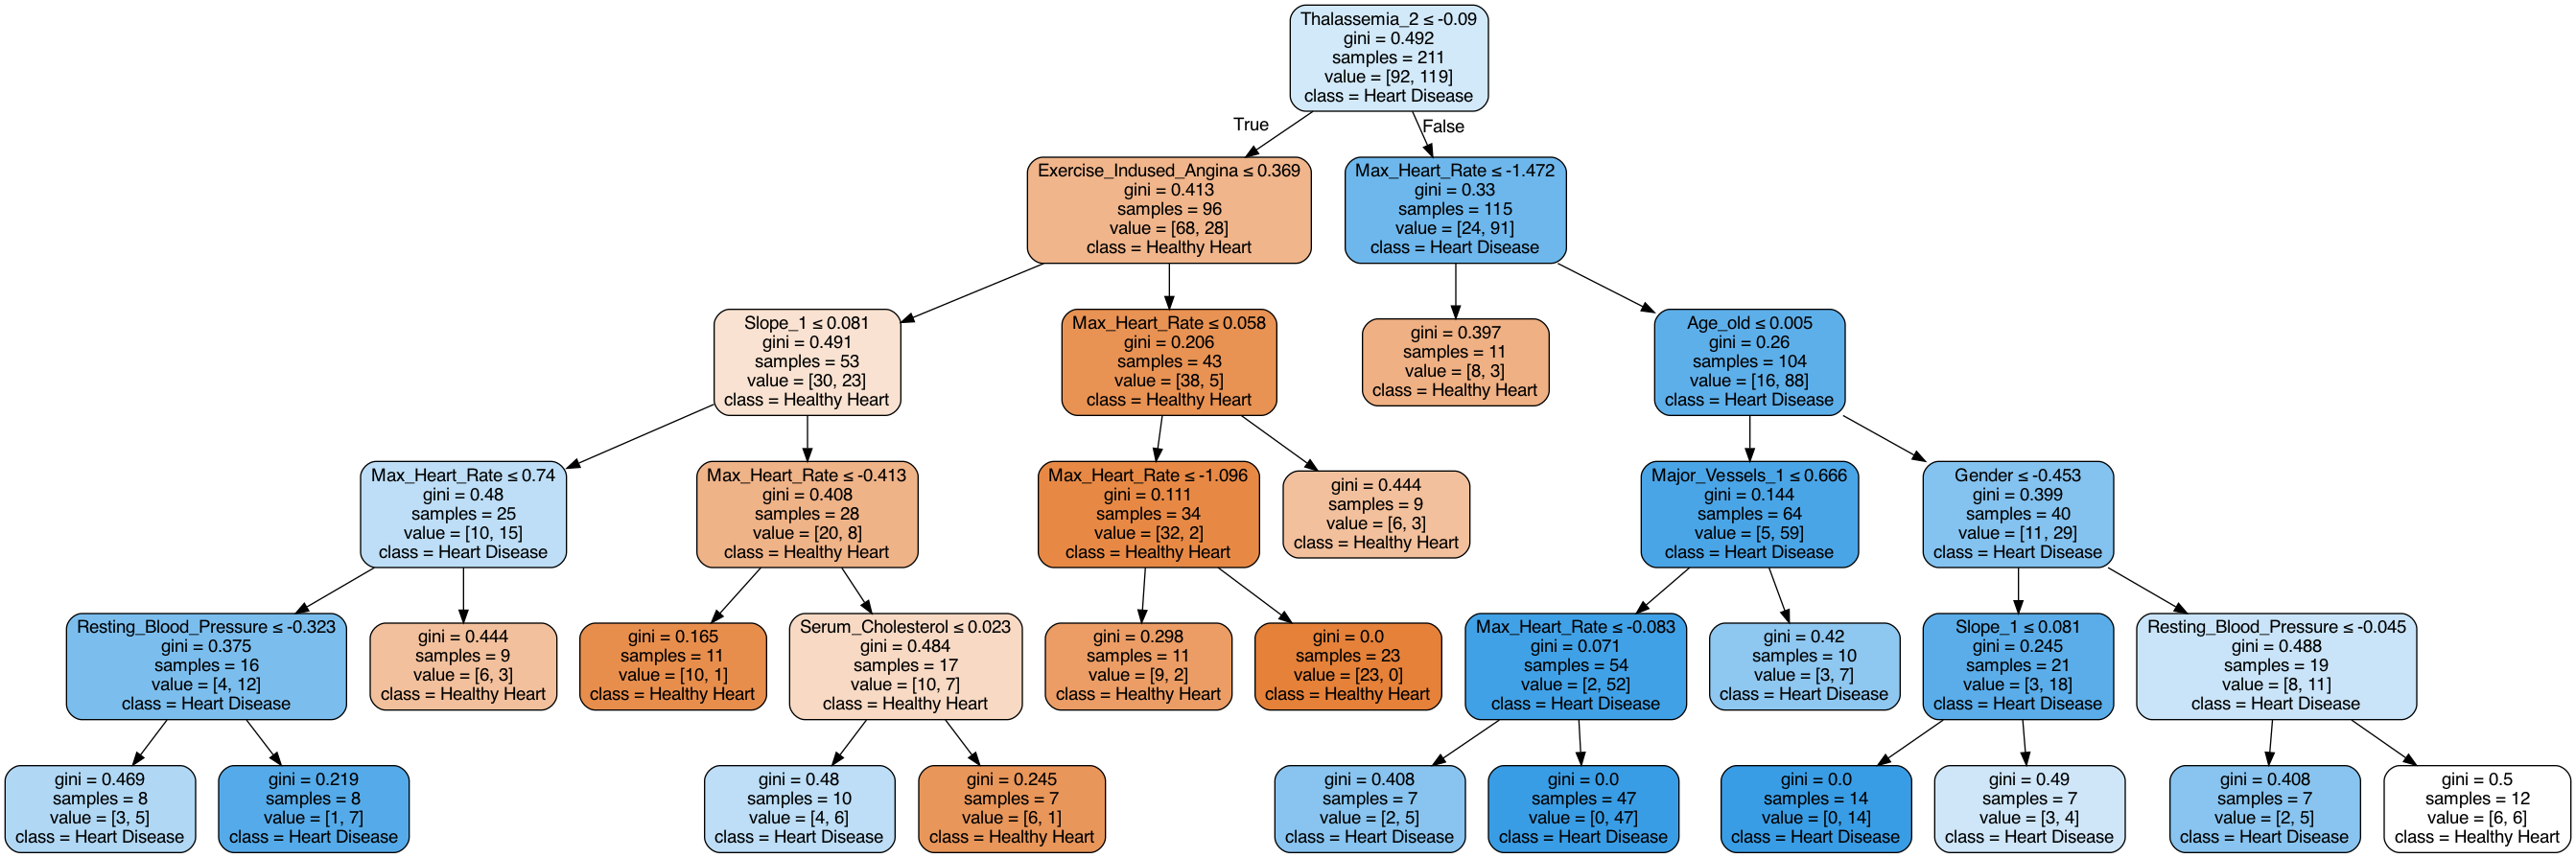

In [103]:
# Simple decision tree (ID3)
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state=1, criterion = 'gini', max_depth = 7, min_samples_leaf = 7, min_samples_split = 2)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

clf_f1_train = round(f1_score(y_train, y_pred_train), 3)
clf_f1_test = round(f1_score(y_test, y_pred), 3)
clf_recall = round(metrics.recall_score(y_test, y_pred), 3)

print('Recall Score: ', clf_recall)
print('Train F1 score: ', clf_f1_train)
print('Test F1 score: ', clf_f1_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Healthy Heart','Heart Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

[0.04407863 0.06143347 0.07001203 0.02173348 0.07950668 0.08737569
 0.04002139 0.01614259 0.02296789 0.03667154 0.03346404 0.00304073
 0.04335805 0.04245829 0.0467569  0.03205009 0.02372462 0.00304934
 0.00727443 0.09347344 0.08666009 0.02674265 0.05217523 0.0258287 ]


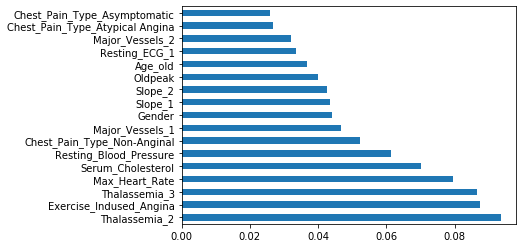

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc_predicted_train = rfc.predict(X_train)
rfc_recall_score = metrics.recall_score(y_test, rfc_predicted)

In [105]:
rfc_f1_train = round(f1_score(y_train, rfc_predicted_train), 3)
rfc_f1_test = round(f1_score(y_test, rfc_predicted), 3)
rfc_recall = round(metrics.recall_score(y_test, rfc_predicted), 3)

print('Recall Score: ', rfc_recall)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1_test)

Recall Score:  0.889
Train F1 score:  0.922
Test F1 score:  0.86


In [106]:
print("Recall of Random Forest:",rfc_recall_score*100,'\n')
print(classification_report(y_test,rfc_predicted))

Recall of Random Forest: 88.88888888888889 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85        46
         1.0       0.83      0.89      0.86        45

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# Final Grades

In [109]:
print('Baseline Logistic Regression:')
print('Recall Score: ', base_logreg_recall)
print('Train F1 score: ', base_logred_train_f1_score)
print('Test F1 score: ', base_logreg_test_f1_score)
print('')
print('KNN:')
print('Recall Score: ', KNN_recall)
print('Train F1 score: ', KNN_train_f1_score)
print('Test F1 score: ', KNN_f1_score)
print('')
print('Decision Tree:')
print('Recall Score: ', clf_recall)
print('Train F1 score: ', clf_f1_train)
print('Test F1 score: ', clf_f1_test)
print('')
print('Random Forest:')
print('Recall Score: ', rfc_recall)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1_test)

Baseline Logistic Regression:
Recall Score:  0.8444444444444444
Train F1 score:  0.9045643153526971
Test F1 score:  0.8260869565217391

KNN:
Recall Score:  0.9111111111111111
Train F1 score:  0.8537549407114625
Test F1 score:  0.845360824742268

Decision Tree:
Recall Score:  0.844
Train F1 score:  0.844
Test F1 score:  0.792

Random Forest:
Recall Score:  0.889
Train F1 score:  0.922
Test F1 score:  0.86
